# 병충해 분석 AI 프로젝트

## 1. 파일읽기

In [12]:
import numpy as np
import pandas as pd
import os

# 작업경로 설정

#-----------기본경로
base_dir = 'data/'

# 기본경로+폴더명 작성  (폴더명을 os.listdir 로 가져와서 작업해도 됨)
train_imgs = os.path.join(base_dir,'img/Training')
test_imgs = os.path.join(base_dir,'img/Validation')

train_csv = pd.read_csv('data/train_label.csv')
val_csv = pd.read_csv('data/validation_label.csv')

print('end')

end


In [13]:
train_imgs

'data/img/Training'

In [14]:
print(len(train_csv))

train_csv.head(2)

133636


,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201102_0000_S01_...,2020/11/02,NaN,3024,4032,79,0,NaN,0,1,1,13,0,"[{'xtl': 1118, 'ytl': 1294, 'xbr': 2900, 'ybr'...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201102_0002_S01_...,2020/11/02,NaN,3024,4032,79,0,NaN,0,1,1,13,0,"[{'xtl': 1033, 'ytl': 1533, 'xbr': 2829, 'ybr'...",고추_0.정상


In [15]:
print(len(val_csv))
val_csv.head(2)

16701


,image,date,worker,height,width,task,type,region,disease,crop,area,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201103_0000_S01_...,2020/11/03,NaN,3024,4032,79,0,NaN,0,1,1,13,0,"[{'xtl': 502, 'ytl': 1261, 'xbr': 3781, 'ybr':...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201103_0002_S01_...,2020/11/03,NaN,3024,4032,79,0,NaN,0,1,1,13,0,"[{'xtl': 817, 'ytl': 1564, 'xbr': 3693, 'ybr':...",고추_0.정상


In [16]:
train_imgs_list = os.listdir(train_imgs)
test_imgs_list = os.listdir(test_imgs)

In [17]:
train_imgs_list

['[원천]고추_0.정상',
 '[원천]고추_1.질병',
 '[원천]무_0.정상',
 '[원천]무_1.질병',
 '[원천]배추_0.정상',
 '[원천]배추_1.질병',
 '[원천]애호박_0.정상',
 '[원천]애호박_1.질병',
 '[원천]양배추_0.정상',
 '[원천]양배추_1.질병',
 '[원천]오이_0.정상',
 '[원천]오이_1.질병',
 '[원천]잎마름병(토마토)_0.정상',
 '[원천]잎마름병(토마토)_1.질병',
 '[원천]콩_0.정상',
 '[원천]콩_1.질병',
 '[원천]파_0.정상',
 '[원천]파_1.질병',
 '[원천]호박_0.정상',
 '[원천]호박_1.질병']

In [18]:
train_imgs_fnames = []

for img in train_imgs_list[:2]:
    
    tmp = []
    tmp = os.listdir(f'{train_imgs}/{img}')
    tmp = tmp #[:1000]
    print(img, len(tmp))
    train_imgs_fnames.extend(tmp)

len(train_imgs_fnames)


[원천]고추_0.정상 8575
[원천]고추_1.질병 1888


10463

In [19]:
test_imgs_fnames = []

for img in test_imgs_list[:2]:
    tmp = []
    tmp = os.listdir(f'{test_imgs}/{img}')
    tmp = tmp#[:1000]
    print(img, len(tmp))
    test_imgs_fnames.extend(tmp)

len(test_imgs_fnames)

[원천]고추_0.정상 1110
[원천]고추_1.질병 229


1339

In [20]:
print('훈련이미지 갯수:',  len(train_imgs_fnames))
print('테스트이미지 갯수:', len(test_imgs_fnames))

훈련이미지 갯수: 10463
테스트이미지 갯수: 1339


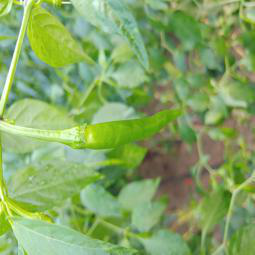

In [21]:
 #샘플 사진 확인
sample = f'{train_imgs}/{train_imgs_list[0]}/{train_imgs_fnames[0]}'
from PIL import Image
sample_img = Image.open(sample)
sample_img = sample_img.resize((255,255))
sample_img

## csv 필요한 정보로 축약

In [26]:
train_pepper_0 = train_csv[:8575]
train_pepper_0 = train_pepper_0[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
train_pepper_0.tail(2)

,image,disease,crop,grow,risk,points,name
8573,V006_79_0_00_01_05_13_0_c32_20201130_0114_S01_...,0,1,13,0,"[{'xtl': 0, 'ytl': 0, 'xbr': 2782, 'ybr': 3024}]",고추_0.정상
8574,V006_79_0_00_01_05_13_0_c32_20201130_0115_S01_...,0,1,13,0,"[{'xtl': 0, 'ytl': 0, 'xbr': 2536, 'ybr': 1988}]",고추_0.정상


In [27]:
train_pepper_1 = train_csv[8575:10463]
train_pepper_1 = train_pepper_1[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
train_pepper_1.tail(2)

,image,disease,crop,grow,risk,points,name
10461,V006_79_1_02_01_03_13_3_9315z_20201126_7.JPG,2,1,13,3,"[{'xtl': 406, 'ytl': 452, 'xbr': 5140, 'ybr': ...",고추_1.질병
10462,V006_79_1_02_01_03_13_3_9315z_20201126_9.JPG,2,1,13,3,"[{'xtl': 0, 'ytl': 295, 'xbr': 3634, 'ybr': 26...",고추_1.질병


In [28]:
val_pepper_0 = val_csv[:1110]
val_pepper_0 = val_pepper_0[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
val_pepper_0.tail(2)

,image,disease,crop,grow,risk,points,name
1108,V006_79_0_00_01_05_13_0_c32_20201130_0098_S01_...,0,1,13,0,"[{'xtl': 148, 'ytl': 0, 'xbr': 3024, 'ybr': 25...",고추_0.정상
1109,V006_79_0_00_01_05_13_0_c32_20201130_0101_S01_...,0,1,13,0,"[{'xtl': 0, 'ytl': 590, 'xbr': 3024, 'ybr': 39...",고추_0.정상


In [29]:
val_pepper_1 = val_csv[1110:1339]
val_pepper_1 = val_pepper_1[['image', 'disease', 'crop', 'grow', 'risk', 'points', 'name']]
val_pepper_1.head(2)

,image,disease,crop,grow,risk,points,name
1110,V006_79_1_01_01_01_13_1_0424z_20200929_6.JPG,1,1,13,1,"[{'xtl': 2370, 'ytl': 1314, 'xbr': 4765, 'ybr'...",고추_1.질병
1111,V006_79_1_01_01_01_13_1_0424z_20201023_11.JPG,1,1,13,1,"[{'xtl': 2890, 'ytl': 308, 'xbr': 3820, 'ybr':...",고추_1.질병


In [30]:
print(train_pepper_0['disease'].unique())
print(train_pepper_1['disease'].unique())
print(val_pepper_0['disease'].unique())
print(val_pepper_1['disease'].unique())


[0]
[1 2]
[0]
[1 2]


## 이미지 사이즈 조절
- 용량이 너무커 작업속도가 늦어져 사이즈를 미리 조정해서 저장하는 작업을 진행함

In [ ]:
# train 고추 정상 파일 사이즈 조절 작업
import os
import glob
from PIL import Image
# 한글폴더로 할경우 경로를 못읽어 강제로 설정
os.chdir('D:/Workspace/04.Project/project_02/data/img/Training/[원천]고추_0.정상')

files = glob.glob('*')
for f in files:
    img = Image.open(f)
    img_resize = img.resize((255, 255)) # 이미지 리사이즈
    img_resize.save(f) #이미지 경로 설정후 저장

In [47]:
# train 고추 질병 파일 사이즈 조절 작업
import os
import glob
from PIL import Image
# 한글폴더로 할경우 경로를 못읽어 강제로 설정
os.chdir('D:/Workspace/04.Project/project_02/data/img/Training/[원천]고추_1.질병')
files = glob.glob('*')
len(files)
for f in files:
    img = Image.open(f)
    img_resize = img.resize((255, 255)) # 이미지 리사이즈
    img_resize.save(f) #이미지 경로 설정후 저장

In [50]:
# validation 고추 정상 파일 사이즈 조절작업
import os
import glob
from PIL import Image
# 한글폴더로 할경우 경로를 못읽어 강제로 설정
os.chdir('D:/Workspace/04.Project/project_02/data/img/Validation/[원천]고추_0.정상')

files = glob.glob('*')
len(files)
for f in files:
    img = Image.open(f)
    img_resize = img.resize((255, 255)) # 이미지 리사이즈
    img_resize.save(f) #이미지 경로 설정후 저장

In [51]:
# validation 고추 질병 파일 사이즈 작업
import os
import glob
from PIL import Image
# 한글폴더로 할경우 경로를 못읽어 강제로 설정
os.chdir('D:/Workspace/04.Project/project_02/data/img/Validation/[원천]고추_1.질병')

files = glob.glob('*')
len(files)
for f in files:
    img = Image.open(f)
    img_resize = img.resize((255, 255)) # 이미지 리사이즈
    img_resize.save(f) #이미지 경로 설정후 저장

In [ ]:
# 질병코드별 폴더 만들어서 이미지 옴기기 위한 작업
#  폴더에 train과 validation폴더를 제작하고
# 각각 폴더에 code번호대로 폴더를 제작함
import os
os.makedirs('data/project/pepper/train')
os.makedirs('data/project/pepper/validation')

# 질병 코드 폴더 생성
for i in train_pepper_0['disease'].unique():
  os.mkdir(f'data/project/pepper/train/'+ str(i))
  os.mkdir(f'data/project/pepper/validation/'+ str(i))
# 질병 코드 폴더 생성
for i in train_pepper_1['disease'].unique():
    os.mkdir(f'data/project/pepper/train/'+ str(i))
    os.mkdir(f'data/project/pepper/validation/'+ str(i))

In [58]:
os.chdir('D:/Workspace/04.Project/project_02')

# 작물코드, 질병코드 별 폴더 구분

In [59]:
# train 정상 폴더 이동
import shutil
# 이미지와 질병코드로 구분하여 옴기기전(before) 좌표와 옴긴후(target) 좌표를 설정해 질병코드(disease)에 맞게 이동
for item,category in zip(train_pepper_0['image'], train_pepper_0['disease']):
  source= item
  before= 'data/img/Training/[원천]고추_0.정상/' + item
  target='data/project/1/train/' + str(category) + '/'+item

  #print(source,target)
  try:
    shutil.copyfile(before,target)
  except:
    print('error==>'+source )


In [60]:
# train 질병 폴더 이동
import shutil

for item,category in zip(train_pepper_1['image'], train_pepper_1['disease']):
  source= item
  before= 'data/img/Training/[원천]고추_1.질병/' + item
  target='data/project/1/train/' + str(category) + '/'+item

  #print(source,target)
  try:
    shutil.copyfile(before,target)
  except:
    print('error==>'+source )


In [61]:
# validation 정상 폴더이동
import shutil
# 이미지와 질병코드로 구분하여 옴기기전(before) 좌표와 옴긴후(target) 좌표를 설정해 질병코드(disease)에 맞게 이동
for item,category in zip(val_pepper_0['image'], val_pepper_0['disease']):
  source= item
  before= 'data/img/validation/[원천]고추_0.정상/' + item
  target='data/project/1/validation/' + str(category) + '/'+item

  #print(source,target)
  try:
    shutil.copyfile(before,target)
  except:
    print('error==>'+source )


In [62]:
# validation 질병 폴더이동
import shutil
# 이미지와 질병코드로 구분하여 옴기기전(before) 좌표와 옴긴후(target) 좌표를 설정해 질병코드(disease)에 맞게 이동
for item,category in zip(val_pepper_1['image'], val_pepper_1['disease']):
  source= item
  before= 'data/img/validation/[원천]고추_1.질병/' + item
  target='data/project/1/validation/' + str(category) + '/'+item

  #print(source,target)
  try:
    shutil.copyfile(before,target)
  except:
    print('error==>'+source )


# x y 데이터셋 제작
- x: train 이미지
- y: train disease 번호

In [86]:
# 폴더 리스트 가져오기
from glob import glob
from PIL import Image
import numpy as np

path = 'data/project/1/train/'
X=[]
for x in range(3):
    imgList = os.listdir(path + str(x))


    for item in imgList:
        img = Image.open(path + str(x)+'/' + item)
        img = img.resize((255, 255)) ## 추가됨
        imgarr = np.array(img)/255 # 스케일링
        X.append(imgarr)

In [87]:
print(np.shape(X))

(10463, 255, 255, 3)


In [90]:
pd.concat([train_pepper_0, train_pepper_1])

,image,disease,crop,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201102_0000_S01_...,0,1,13,0,"[{'xtl': 1118, 'ytl': 1294, 'xbr': 2900, 'ybr'...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201102_0002_S01_...,0,1,13,0,"[{'xtl': 1033, 'ytl': 1533, 'xbr': 2829, 'ybr'...",고추_0.정상
2,V006_79_0_00_01_01_13_0_a01_20201103_0001_S01_...,0,1,13,0,"[{'xtl': 484, 'ytl': 1227, 'xbr': 3879, 'ybr':...",고추_0.정상
3,V006_79_0_00_01_01_13_0_a01_20201103_0003_S01_...,0,1,13,0,"[{'xtl': 1241, 'ytl': 103, 'xbr': 2344, 'ybr':...",고추_0.정상
4,V006_79_0_00_01_01_13_0_a05_20201111_0000_S01_...,0,1,13,0,"[{'xtl': 1382, 'ytl': 978, 'xbr': 3226, 'ybr':...",고추_0.정상
...,...,...,...,...,...,...,...
10458,V006_79_1_02_01_03_13_3_9315z_20201126_3.JPG,2,1,13,3,"[{'xtl': 598, 'ytl': 469, 'xbr': 5168, 'ybr': ...",고추_1.질병
10459,V006_79_1_02_01_03_13_3_9315z_20201126_4.JPG,2,1,13,3,"[{'xtl': 0, 'ytl': 858, 'xbr': 4927, 'ybr': 30...",고추_1.질병
10460,V006_79_1_02_01_03_13_3_9315z_20201126_5.JPG,2,1,13,3,"[{'xtl': 672, 'ytl': 483, 'xbr': 5277, 'ybr': ...",고추_1.질병
10461,V006_79_1_02_01_03_13_3_9315z_20201126_7.JPG,2,1,13,3,"[{'xtl': 406, 'ytl': 452, 'xbr': 5140, 'ybr': ...",고추_1.질병


In [92]:
# 정상데이터와 질병데이터 병합
train_csv = pd.concat([train_pepper_0, train_pepper_1])
train_csv

,image,disease,crop,grow,risk,points,name
0,V006_79_0_00_01_01_13_0_a01_20201102_0000_S01_...,0,1,13,0,"[{'xtl': 1118, 'ytl': 1294, 'xbr': 2900, 'ybr'...",고추_0.정상
1,V006_79_0_00_01_01_13_0_a01_20201102_0002_S01_...,0,1,13,0,"[{'xtl': 1033, 'ytl': 1533, 'xbr': 2829, 'ybr'...",고추_0.정상
2,V006_79_0_00_01_01_13_0_a01_20201103_0001_S01_...,0,1,13,0,"[{'xtl': 484, 'ytl': 1227, 'xbr': 3879, 'ybr':...",고추_0.정상
3,V006_79_0_00_01_01_13_0_a01_20201103_0003_S01_...,0,1,13,0,"[{'xtl': 1241, 'ytl': 103, 'xbr': 2344, 'ybr':...",고추_0.정상
4,V006_79_0_00_01_01_13_0_a05_20201111_0000_S01_...,0,1,13,0,"[{'xtl': 1382, 'ytl': 978, 'xbr': 3226, 'ybr':...",고추_0.정상
...,...,...,...,...,...,...,...
10458,V006_79_1_02_01_03_13_3_9315z_20201126_3.JPG,2,1,13,3,"[{'xtl': 598, 'ytl': 469, 'xbr': 5168, 'ybr': ...",고추_1.질병
10459,V006_79_1_02_01_03_13_3_9315z_20201126_4.JPG,2,1,13,3,"[{'xtl': 0, 'ytl': 858, 'xbr': 4927, 'ybr': 30...",고추_1.질병
10460,V006_79_1_02_01_03_13_3_9315z_20201126_5.JPG,2,1,13,3,"[{'xtl': 672, 'ytl': 483, 'xbr': 5277, 'ybr': ...",고추_1.질병
10461,V006_79_1_02_01_03_13_3_9315z_20201126_7.JPG,2,1,13,3,"[{'xtl': 406, 'ytl': 452, 'xbr': 5140, 'ybr': ...",고추_1.질병


In [93]:
y = []
for item in train_csv['disease']:
  y.append(item)

In [94]:
print(np.shape(y))

(10463,)


In [95]:
np.unique(y)

array([0, 1, 2])

In [97]:
type(X), type(y)

(list, list)

In [ ]:
# np.array 로 변환해야 작업 가능
X = np.array(X)
y = np.array(y)

In [98]:
# npz 파일 제작
np.savez('data/test_plant.npz', X=X, Y=y)

--x값--


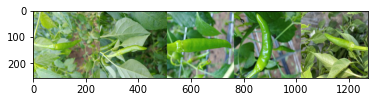

--y value--
[0, 0, 0, 0, 0]


In [102]:
# 5개의 이미지를 수평으로 나란히 출력
import matplotlib.pyplot as plt

print('--x값--')
plt.imshow(np.hstack(X[:5]))
plt.show()

print('--y value--')
print(y[:5])